
# CIFAR-10 Multiple Classes

CIFAR-10 dataset consists of 10 different image types.

In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

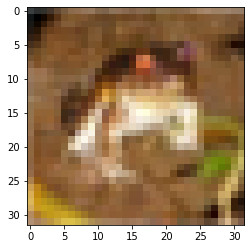

In [6]:
# FROG
plt.imshow(x_train[0])

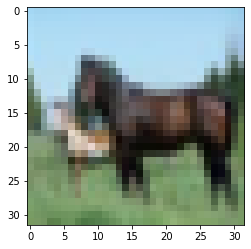

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER 
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [27]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5169 - accuracy: 0.4601 - val_loss: 1.4763 - val_accuracy: 0.4858
Epoch 2/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1746 - accuracy: 0.5899 - val_loss: 1.2614 - val_accuracy: 0.5621
Epoch 3/15
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0268 - accuracy: 0.6427 - val_loss: 1.0813 - val_accuracy: 0.6176
Epoch 4/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9250 - accuracy: 0.6784 - val_loss: 1.0884 - val_accuracy: 0.6352
Epoch 5/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8519 - accuracy: 0.7072 - val_loss: 1.0889 - val_accuracy: 0.6352
Epoch 6/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7917 - accuracy: 0.7268 - val_loss: 1.1409 - val_accuracy: 0.6368
Epoch 7/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7400 - accuracy: 0.7500 - val_loss: 1.1624 -

In [28]:
losses = pd.DataFrame(model.history.history)

In [29]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.516851,0.46010,1.476295,0.4858
1,1.174648,0.58990,1.261424,0.5621
2,1.026790,0.64274,1.081291,0.6176
3,0.925044,0.67844,1.088420,0.6352
4,0.851887,0.70720,1.088888,0.6352


<AxesSubplot:>

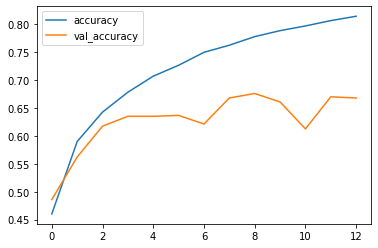

In [30]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

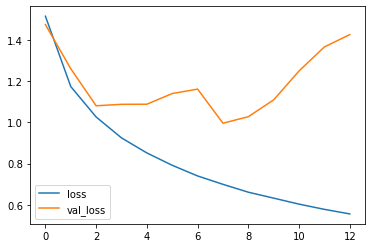

In [31]:
losses[['loss','val_loss']].plot()

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.4275329113006592, 0.6679999828338623]


In [34]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.59      0.69      1000
           1       0.71      0.86      0.78      1000
           2       0.56      0.64      0.59      1000
           3       0.51      0.47      0.49      1000
           4       0.65      0.59      0.62      1000
           5       0.54      0.62      0.58      1000
           6       0.85      0.62      0.72      1000
           7       0.78      0.70      0.74      1000
           8       0.76      0.78      0.77      1000
           9       0.64      0.81      0.71      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [36]:
confusion_matrix(y_test,predictions)

array([[591,  49,  83,  24,  23,   9,   2,   8, 129,  82],
       [  7, 857,   8,   4,   1,   1,   2,   3,  17, 100],
       [ 35,  14, 639,  66,  58,  95,  33,  17,  18,  25],
       [ 13,  34, 100, 469,  62, 205,  19,  36,  16,  46],
       [ 11,  17,  96,  77, 586,  63,  29,  75,  23,  23],
       [ 10,  14,  72, 139,  49, 621,  13,  39,  13,  30],
       [  4,  23,  66,  92,  51,  74, 623,  11,   6,  50],
       [  7,  17,  47,  37,  58,  73,   5, 700,   7,  49],
       [ 38,  65,  27,   7,   7,  12,   4,   2, 783,  55],
       [  8, 113,  13,  13,   5,   6,   1,   5,  25, 811]], dtype=int64)

<AxesSubplot:>

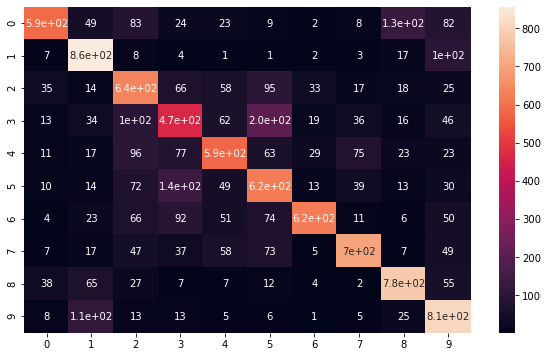

In [37]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

In [38]:
my_image = x_test[16]

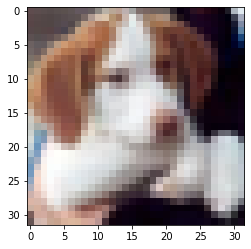

In [39]:
plt.imshow(my_image)

In [40]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)

In [41]:
# 5 is DOG